In [45]:
#imports
import numpy as np
import pandas as pd
import sqlite3
import os

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
#Get all dataframes from db
import sqlite3
conn = sqlite3.connect('database.sqlite')
#Create dataframes
country_df = pd.read_sql_query("SELECT * FROM Country", conn)
league_df = pd.read_sql_query("SELECT * FROM League", conn)
team_df = pd.read_sql_query("SELECT * FROM Team", conn)
match_df = pd.read_sql_query("SELECT * FROM Match", conn)
player_df = pd.read_sql_query("SELECT * FROM Player", conn)
player_attr_df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)
team_attr_df = pd.read_sql_query("SELECT * FROM Team_Attributes", conn)



In [16]:
tables = {
    "Country": country_df,
    "League":league_df,
    "Team": team_df,
    "Match": match_df,
    "Player": player_df,
    "Player_Attributes": player_attr_df,
    "Team_Attributes": team_attr_df ,
}

In [18]:
#Remove null
null_counts = match_df.isnull().sum()

# Combine results into a DataFrame
missing_values_df = pd.DataFrame({
    "Column": match_df .columns,
    "NaN Count": null_counts.values,


})

counts = match_df.notnull().sum()

null_counts = player_df.isnull().sum()

missing_values_df = pd.DataFrame({
    "Column": player_df.columns,
    "NaN Count": null_counts.values,


})

null_counts = team_attr_df.isnull().sum()


missing_values_df = pd.DataFrame({
    "Column": team_attr_df .columns,
    "NaN Count": null_counts.values,


})

null_counts = league_df .isnull().sum()  # Count NaN values


missing_values_df = pd.DataFrame({
    "Column": league_df   .columns,
    "NaN Count": null_counts.values,


})

null_counts = team_df .isnull().sum()  # Count NaN values


missing_values_df = pd.DataFrame({
    "Column": team_df   .columns,
    "NaN Count": null_counts.values,


})

In [20]:
columns_to_drop = [
    # Player positions (X, Y coordinates)
    'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5',
    'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11',
    'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5',
    'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11',

    # Player IDs (Who played in the match)
    'home_player_1', 'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5',
    'home_player_6', 'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10', 'home_player_11',
    'away_player_1', 'away_player_2', 'away_player_3', 'away_player_4', 'away_player_5',
    'away_player_6', 'away_player_7', 'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11'
]


match_df = match_df.drop(columns=columns_to_drop, errors='ignore')
#print(match_df.columns)

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_Y1', 'home_player_Y2',
       'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
       'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10',
       'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3',
       'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_player_Y9', 'away_player_Y10',
       'away_player_Y11', 'goal', 'shoton', 'shotoff', 'foulcommit', 'card',
       'cross', 'corner', 'possession', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD',
       'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA',
       'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object')


In [21]:
columns_to_drop = ['home_player_Y1', 'home_player_Y2',
       'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
       'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10',
       'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3',
       'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_player_Y9', 'away_player_Y10',
       'away_player_Y11']

match_df = match_df.drop(columns=columns_to_drop, errors='ignore')


print(match_df.columns)

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'goal', 'shoton', 'shotoff',
       'foulcommit', 'card', 'cross', 'corner', 'possession', 'B365H', 'B365D',
       'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA',
       'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH',
       'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object')


In [22]:
#Drop null columns
match_df = match_df.loc[:, : "B365H"]


In [23]:
match_df = match_df.drop(columns=["goal","B365H","corner","cross","foulcommit","shotoff"], errors='ignore')

In [24]:
null_counts = match_df.isnull().sum()
null_counts

,0
id,0
country_id,0
league_id,0
season,0
stage,0
date,0
match_api_id,0
home_team_api_id,0
away_team_api_id,0
home_team_goal,0


In [25]:
import pandas as pd
import re


def extract_card_types(xml_string, home_team_id, away_team_id):
    if pd.isna(xml_string) or xml_string.strip() in ["<card />", ""]:
        return None

    card_entries = re.findall(r"<value>.*?</value>", xml_string)
    yellow_home = yellow_away = red_home = red_away = 0

    for entry in card_entries:
        team_match = re.search(r"<team>(\d+)</team>", entry)
        if not team_match:
            continue
        team_id = int(team_match.group(1))

        card_type_match = re.search(r"<card_type>(y|r)</card_type>", entry)
        if not card_type_match:
            continue

        card_type = card_type_match.group(1)
        if team_id == home_team_id:
            yellow_home += (card_type == "y")
            red_home += (card_type == "r")
        elif team_id == away_team_id:
            yellow_away += (card_type == "y")
            red_away += (card_type == "r")

    return yellow_home, red_home, yellow_away, red_away

# Extract and split card counts into separate columns
match_df["card_counts"] = match_df.apply(
    lambda row: extract_card_types(row["card"], row["home_team_api_id"], row["away_team_api_id"]), axis=1
)
match_df = match_df.dropna(subset=["card_counts"])  # Remove rows where card data is missing
match_df[["yellow_home", "red_home", "yellow_away", "red_away"]] = match_df["card_counts"].apply(pd.Series)
match_df.drop(columns=["card_counts"], inplace=True)

match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,shoton,card,possession,yellow_home,red_home,yellow_away,red_away
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,1,<shoton><value><stats><blocked>1</blocked></st...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>56</comment><event...,3,0,0,0
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,1,<shoton><value><stats><blocked>1</blocked></st...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>45</comment><event...,0,0,2,0
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,1,<shoton><value><stats><shoton>1</shoton></stat...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>50</comment><event...,2,0,1,0
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,2,<shoton><value><stats><blocked>1</blocked></st...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>51</comment><event...,0,0,1,0
1733,1734,1729,1729,2008/2009,1,2008-08-16 00:00:00,489047,8668,8655,2,3,<shoton><value><stats><shoton>1</shoton></stat...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>46</comment><event...,2,0,2,0


In [26]:
def extract_latest_possession(xml_string):
    if pd.isna(xml_string) or xml_string.strip() in ["<possession />", ""]:
        return None

    possession_entries = re.findall(r"<value>.*?</value>", xml_string)
    if not possession_entries:
        return None

    latest_entry = possession_entries[-1]

    homepos_match = re.search(r"<homepos>(\d+)</homepos>", latest_entry)
    homepos = int(homepos_match.group(1)) if homepos_match else None

    awaypos_match = re.search(r"<awaypos>(\d+)</awaypos>", latest_entry)
    awaypos = int(awaypos_match.group(1)) if awaypos_match else None

    return homepos, awaypos

match_df["possession_counts"] = match_df["possession"].apply(extract_latest_possession)
match_df = match_df.dropna(subset=["possession_counts"])
match_df[["home_possession", "away_possession"]] = match_df["possession_counts"].apply(pd.Series)
match_df.drop(columns=["possession_counts"], inplace=True)
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,shoton,card,possession,yellow_home,red_home,yellow_away,red_away,home_possession,away_possession
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,1,<shoton><value><stats><blocked>1</blocked></st...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>56</comment><event...,3,0,0,0,55.0,45.0
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,1,<shoton><value><stats><blocked>1</blocked></st...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>45</comment><event...,0,0,2,0,46.0,54.0
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,1,<shoton><value><stats><shoton>1</shoton></stat...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>50</comment><event...,2,0,1,0,52.0,48.0
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,2,<shoton><value><stats><blocked>1</blocked></st...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>51</comment><event...,0,0,1,0,52.0,48.0
1733,1734,1729,1729,2008/2009,1,2008-08-16 00:00:00,489047,8668,8655,2,3,<shoton><value><stats><shoton>1</shoton></stat...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>46</comment><event...,2,0,2,0,51.0,49.0


In [27]:
import re
import xml.etree.ElementTree as ET
def extract_shoton_counts(xml_string, home_team_id, away_team_id):
    if pd.isna(xml_string) or xml_string.strip() in ["<shoton />", ""]:
        return 0, 0  # No shots recorded

    # Parse the XML structure
    root = ET.fromstring(xml_string)

    home_shots = 0
    away_shots = 0

    # Loop through each <value> entry inside <shoton>
    for value in root.findall("value"):
        team_element = value.find("team")
        shoton_element = value.find(".//stats/shoton")  # Only count actual shots on target

        if team_element is not None and shoton_element is not None:
            team_id = int(team_element.text)

            if team_id == home_team_id:
                home_shots += 1
            elif team_id == away_team_id:
                away_shots += 1

    return home_shots, away_shots

# Apply the function to each row in match_df
match_df["shoton_counts"] = match_df.apply(
    lambda row: extract_shoton_counts(row["shoton"], row["home_team_api_id"], row["away_team_api_id"]),
    axis=1
)

# Split into separate columns
match_df[["home_shoton", "away_shoton"]] = match_df["shoton_counts"].apply(pd.Series)

In [28]:
match_df

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,possession,yellow_home,red_home,yellow_away,red_away,home_possession,away_possession,shoton_counts,home_shoton,away_shoton
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,<possession><value><comment>56</comment><event...,3,0,0,0,55.0,45.0,"(6, 1)",6,1
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,<possession><value><comment>45</comment><event...,0,0,2,0,46.0,54.0,"(3, 2)",3,2
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,<possession><value><comment>50</comment><event...,2,0,1,0,52.0,48.0,"(4, 2)",4,2
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,...,<possession><value><comment>51</comment><event...,0,0,1,0,52.0,48.0,"(3, 6)",3,6
1733,1734,1729,1729,2008/2009,1,2008-08-16 00:00:00,489047,8668,8655,2,...,<possession><value><comment>46</comment><event...,2,0,2,0,51.0,49.0,"(1, 4)",1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24552,24553,21518,21518,2015/2016,9,2015-10-25 00:00:00,2030167,9906,10267,2,...,<possession><value><comment>49</comment><stats...,4,0,4,0,49.0,51.0,"(6, 1)",6,1
24553,24554,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030168,9864,9783,2,...,<possession><value><comment>53</comment><stats...,0,0,1,0,50.0,50.0,"(2, 1)",2,1
24554,24555,21518,21518,2015/2016,9,2015-10-26 00:00:00,2030169,8315,9869,3,...,<possession><value><comment>49</comment><stats...,1,0,3,0,52.0,48.0,"(3, 0)",3,0
24555,24556,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030170,7878,8603,1,...,<possession><value><comment>50</comment><stats...,3,0,3,0,45.0,55.0,"(7, 3)",7,3


Match Statistics (Performance Metrics)

These columns summarize key game events.

Column Name	Description

* goal	JSON-encoded match goal details (who scored, when).

* shoton	JSON-encoded data of shots on target.

* shotoff	JSON-encoded data of shots off target.

* foulcommit	JSON-encoded data on fouls committed.

* card	JSON-encoded details of yellow and red cards.

* cross	Number of successful crosses.

* corner	Number of corners won.

* possession	Percentage of ball possession per team.

Possession (%)
The percentage of total game time a team controls the ball.
High possession: More control over the game.
Low possession: Likely playing defensively or counter-attacking

Shots on Target (shoton)¶
Number of shots directed at the goal that require a save or result in a goal.
Higher values: Indicate an attacking team with better finishing.

Shots Off Target (shotoff)
Number of shots that miss the goal completely.
High values: Could mean poor shot accuracy or desperate attempts.

Fouls Committed (foulcommit)
Total fouls made by a team during the match.
High foul count: Suggests a physical playing style or struggle to regain possession.

Red Cards (card - 'rc')
Players sent off due to serious fouls.
Impact: Red cards leave a team one player short, heavily influencing match outcomes.

Yellow Cards (card - 'yc')
Warnings given for less severe fouls.
Too many yellow cards: Can result in a red card.

Corners (corner)
Number of corner kicks won.
Higher corners: Mean a team is often attacking and forcing the defense to clear the ball.

Crosses (cross)
Passes sent from the wide areas into the penalty box.
High crosses: Indicate a team relies on wing play or tall strikers.
Goals Scored (goal)
Total number of goals by each team.
The ultimate decider: Of a match result.

Team_Attributes Table Explanation
The Team_Attributes table contains 25 columns, describing various characteristics and strategies of football teams.

Identification Columns
* id: Unique identifier for the row in the table.
* team_fifa_api_id: The team’s unique identifier in the FIFA video game database.
* team_api_id: The team’s unique identifier in the dataset.
* date: The date when these attributes were recorded.

Build-Up Play Attributes (How a team starts an attack)¶
* buildUpPlaySpeed: Numerical value representing the speed of a team's attacking build-up.
* buildUpPlaySpeedClass: Categorical class (e.g., "Slow", "Balanced", "Fast") describing the speed.
buildUpPlayDribbling: Numerical value for the tendency to use dribbling in build-up play.
* buildUpPlayDribblingClass: Categorical class describing dribbling tendency.
* buildUpPlayPassing: Numerical value representing passing tendency in the build-up phase.
* buildUpPlayPassingClass: Categorical class (e.g., "Short", "Mixed", "Long") describing passing style.
buildUpPlayPositioningClass: Indicates whether the team uses "Organized" or "Free Form" positioning.

Chance Creation Attributes (How a team creates goal-scoring chances)
* chanceCreationPassing: Numerical value representing passing tendency in the attacking phase.
* chanceCreationPassingClass: Categorical class describing chance-creating passing.
* chanceCreationCrossing: Numerical value for the frequency of crosses in attack.
* chanceCreationCrossingClass: Categorical class describing crossing tendency.
* chanceCreationShooting: Numerical value representing the tendency to take shots.
* chanceCreationShootingClass: Categorical class (e.g., "Rare", "Normal", "Frequent") describing shooting tendency.
* chanceCreationPositioningClass: Indicates whether the team uses "Organized" or "Free Form" positioning in attack.

Defensive Attributes (How a team defends)
* defencePressure: Numerical value representing how high or low the team presses defensively.
* defencePressureClass: Categorical class describing the pressing intensity.
* defenceAggression: Numerical value representing how aggressive the team is in defense.
* defenceAggressionClass: Categorical class (e.g., "Contain", "Balanced", "Press") describing aggression.
* defenceTeamWidth: Numerical value indicating how wide the team defends.
* defenceTeamWidthClass: Categorical class (e.g., "Narrow", "Balanced", "Wide") describing defensive width.
* defenceDefenderLineClass: Describes the defensive line strategy (e.g., "Offside Trap", "Cover").

How to Use These Attributes
* Analyze team styles (e.g., Do they prefer fast counterattacks or slow possession play?).
* Predict match outcomes by comparing attacking and defensive attributes.
* Identify trends across different teams and leagues.

In [29]:
import pandas as pd

# Load match_df and team_attr_df
# match_df = pd.read_csv('match.csv')
# team_attr_df = pd.read_csv('team_attributes.csv')

# Select relevant columns
selected_attributes = [
    'team_api_id', 'date',
    'buildUpPlaySpeed', 'buildUpPlayPassing',
    'chanceCreationShooting', 'chanceCreationCrossing',
    'defencePressure', 'defenceAggression'
]

team_attr_df = team_attr_df[selected_attributes]

# Keep only the most recent entry for each team based on date
team_attr_df = team_attr_df.sort_values(by=['team_api_id', 'date']).groupby('team_api_id').last().reset_index()

# Merge home team attributes
match_df = match_df.merge(
    team_attr_df,
    left_on='home_team_api_id',
    right_on='team_api_id',
    how='left'
)
# Rename columns for home team
match_df.rename(
    columns={
        'buildUpPlaySpeed': 'home_buildUpPlaySpeed',
        'buildUpPlayPassing': 'home_buildUpPlayPassing',
        'chanceCreationShooting': 'home_chanceCreationShooting',
        'chanceCreationCrossing': 'home_chanceCreationCrossing',
        'defencePressure': 'home_defencePressure',
        'defenceAggression': 'home_defenceAggression'
    },
    inplace=True
)

# Drop redundant 'team_api_id' column
match_df.drop(columns=['team_api_id'], inplace=True)

# Merge away team attributes
match_df = match_df.merge(
    team_attr_df,
    left_on='away_team_api_id',
    right_on='team_api_id',
    how='left'
)

# Rename columns for away team
match_df.rename(
    columns={
        'buildUpPlaySpeed': 'away_buildUpPlaySpeed',
        'buildUpPlayPassing': 'away_buildUpPlayPassing',
        'chanceCreationShooting': 'away_chanceCreationShooting',
        'chanceCreationCrossing': 'away_chanceCreationCrossing',
        'defencePressure': 'away_defencePressure',
        'defenceAggression': 'away_defenceAggression'
    },
    inplace=True
)

# Drop redundant 'team_api_id' column
match_df.drop(columns=['team_api_id'], inplace=True)

# Now match_df should still have 8120 rows, but with 12 new feature columns

In [30]:
columns_to_drop = [
    'id', 'country_id', 'league_id', 'season', 'stage', 'date',
    'match_api_id', 'home_team_api_id', 'away_team_api_id', 'shoton',
    'card', 'possession', 'shoton_counts','date_x','date_y'
]

match_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [33]:
#Predict win/loss/draw
import numpy as np
match_df['Outcome'] = np.where(
    match_df['home_team_goal'] > match_df['away_team_goal'], '1',        #  1 == win for home team
    np.where(match_df['home_team_goal'] < match_df['away_team_goal'], '2', '0')        # 2== loss for home team   ,0== draw
)
match_df

,home_team_goal,away_team_goal,yellow_home,red_home,yellow_away,red_away,home_possession,away_possession,home_shoton,away_shoton,...,home_chanceCreationCrossing,home_defencePressure,home_defenceAggression,away_buildUpPlaySpeed,away_buildUpPlayPassing,away_chanceCreationShooting,away_chanceCreationCrossing,away_defencePressure,away_defenceAggression,Outcome
0,1,1,3,0,0,0,55.0,45.0,6,1,...,44,54,53,58,49,46,54,41,39,0
1,0,1,0,0,2,0,46.0,54.0,3,2,...,50,47,45,66,45,46,34,51,52,2
2,2,1,2,0,1,0,52.0,48.0,4,2,...,73,30,37,51,56,40,59,62,48,1
3,4,2,0,0,1,0,52.0,48.0,3,6,...,48,35,44,59,29,24,36,48,47,1
4,2,3,2,0,2,0,51.0,49.0,1,4,...,33,52,58,60,65,42,58,50,50,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,2,1,4,0,4,0,49.0,51.0,6,1,...,62,49,42,35,35,58,51,49,45,1
8120,2,0,0,0,1,0,50.0,50.0,2,1,...,40,47,37,53,47,55,52,45,50,1
8121,3,0,1,0,3,0,52.0,48.0,3,0,...,60,49,57,55,50,38,59,45,54,1
8122,1,1,3,0,3,0,45.0,55.0,7,3,...,63,48,45,59,37,53,43,58,49,0


In [34]:
columns_to_drop = [
    'home_team_goal','away_team_goal'
]

match_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [35]:
print(match_df['Outcome'].unique())

['0' '2' '1']


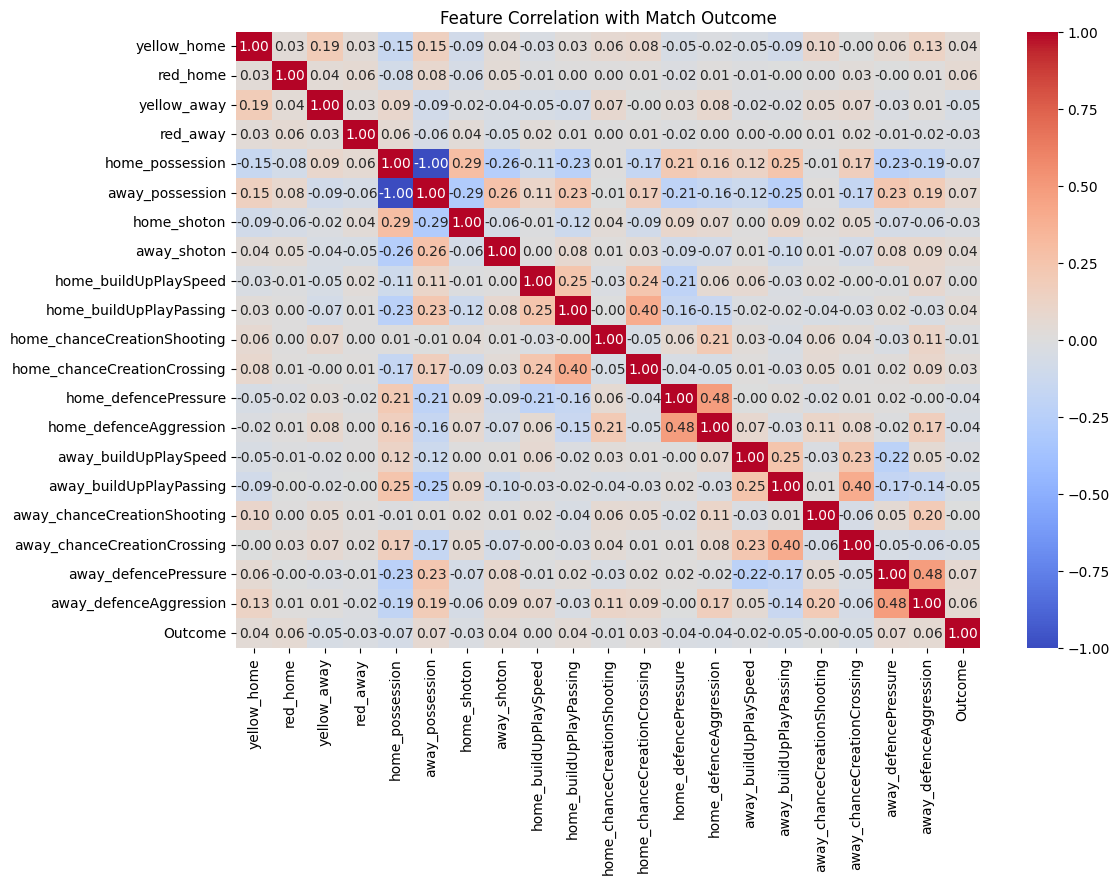

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
match_encoded_df = match_df.copy()

# Compute correlation
plt.figure(figsize=(12, 8))
sns.heatmap(match_encoded_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with Match Outcome")
plt.show()

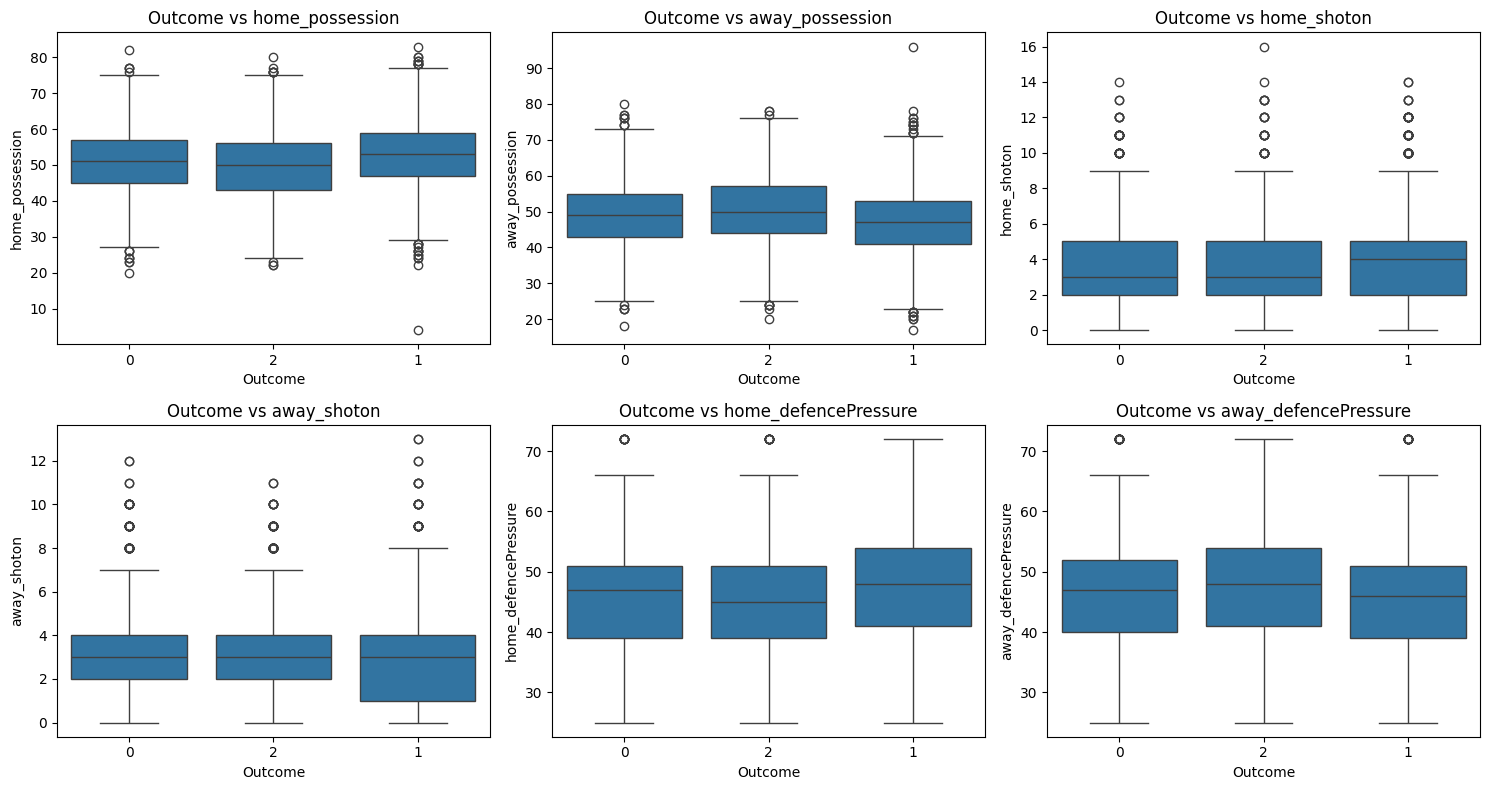

In [39]:
features = ['home_possession', 'away_possession', 'home_shoton', 'away_shoton', 'home_defencePressure', 'away_defencePressure']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Outcome', y=feature, data=match_encoded_df)
    plt.title(f"Outcome vs {feature}")
plt.tight_layout()
plt.show()

In [40]:
performance_metrics = match_df.groupby("Outcome").agg({
    "home_shoton": "mean",
    "away_shoton": "mean",
    "home_possession": "mean",
    "away_possession": "mean"
}).reset_index()


performance_metrics.rename(columns={
    "home_shoton": "Avg_Home_ShotsOn",
    "away_shoton": "Avg_Away_ShotsOn",
    "home_possession": "Avg_Home_Possession",
    "away_possession": "Avg_Away_Possession"
}, inplace=True)

# Display summary
print(performance_metrics)

  Outcome  Avg_Home_ShotsOn  Avg_Away_ShotsOn  Avg_Home_Possession  \
0       0          3.646543          3.012171            51.166991   
1       1          3.939840          2.859626            52.848088   
2       2          3.476824          3.232189            49.562661   

   Avg_Away_Possession  
0            48.833009  
1            47.151912  
2            50.437339  


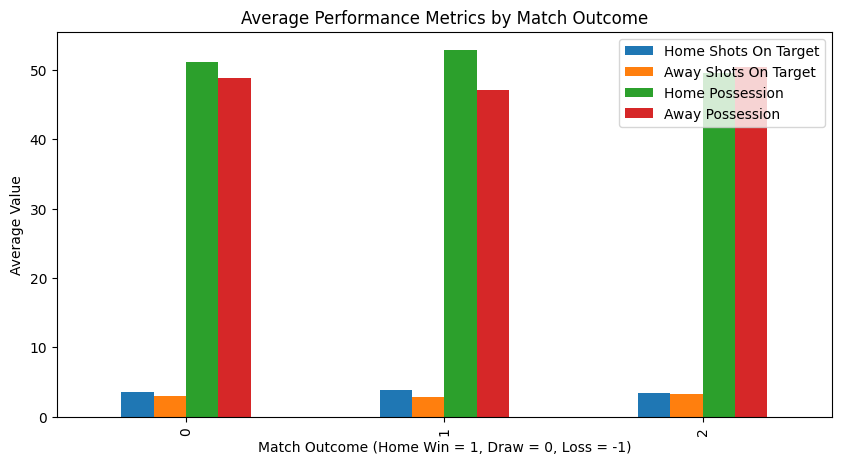

In [41]:
performance_metrics.set_index("Outcome").plot(kind="bar", figsize=(10, 5))
plt.title("Average Performance Metrics by Match Outcome")
plt.xlabel("Match Outcome (Home Win = 1, Draw = 0, Loss = -1)")
plt.ylabel("Average Value")
plt.legend(["Home Shots On Target", "Away Shots On Target", "Home Possession", "Away Possession"])
plt.show()

Outliers detected in each metric:
 yellow_home                     81
red_home                       442
yellow_away                     38
red_away                       490
home_possession                 13
away_possession                 13
home_shoton                     77
away_shoton                     93
home_buildUpPlaySpeed            0
home_buildUpPlayPassing          0
home_chanceCreationShooting      0
home_chanceCreationCrossing      0
home_defencePressure             0
home_defenceAggression           0
away_buildUpPlaySpeed            0
away_buildUpPlayPassing          0
away_chanceCreationShooting      0
away_chanceCreationCrossing      0
away_defencePressure             0
away_defenceAggression           0
dtype: int64
Original dataset size: (8124, 21)
Cleaned dataset size: (6992, 21)


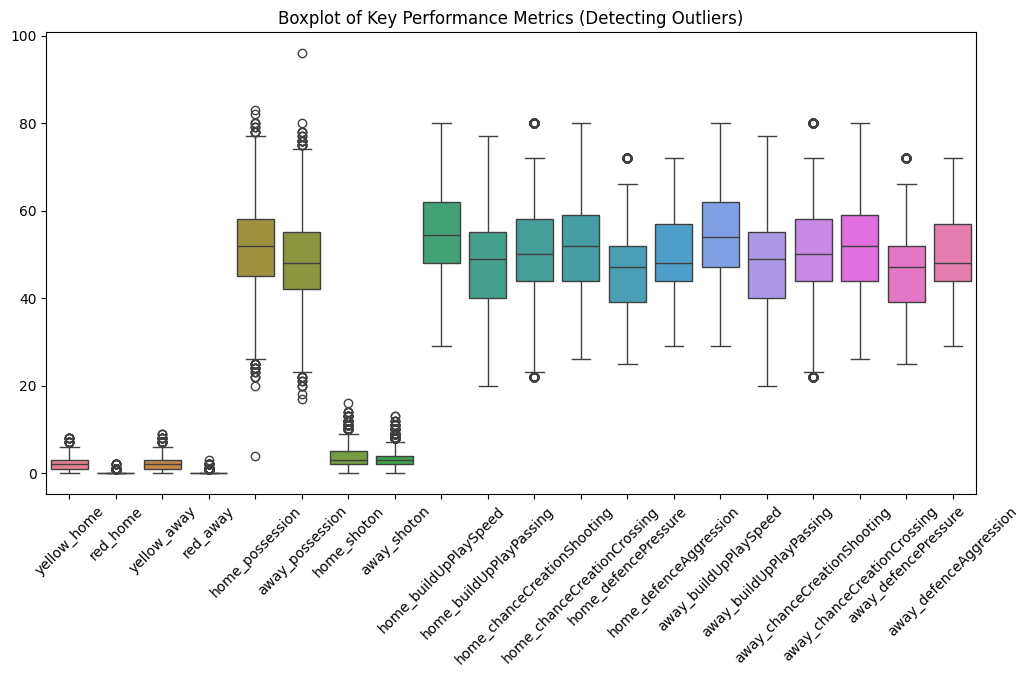

In [88]:
metrics_old = [
    'yellow_home', 'red_home', 'yellow_away', 'red_away', 'home_possession',
       'away_possession', 'home_shoton', 'away_shoton',
       'home_buildUpPlaySpeed', 'home_buildUpPlayPassing',
       'home_chanceCreationShooting', 'home_chanceCreationCrossing',
       'home_defencePressure', 'home_defenceAggression',
       'away_buildUpPlaySpeed', 'away_buildUpPlayPassing',
       'away_chanceCreationShooting', 'away_chanceCreationCrossing',
       'away_defencePressure', 'away_defenceAggression'
]

metrics = [
    'yellow_home', 'red_home', 'yellow_away', 'red_away', 'home_possession',
       'away_possession', 'home_shoton', 'away_shoton',
       'home_buildUpPlaySpeed', 'home_buildUpPlayPassing',
       'home_chanceCreationShooting', 'home_chanceCreationCrossing',
       'home_defencePressure', 'home_defenceAggression',
       'away_buildUpPlaySpeed', 'away_buildUpPlayPassing',
       'away_chanceCreationShooting', 'away_chanceCreationCrossing',
       'away_defencePressure', 'away_defenceAggression'
]
# Compute Z-score (standardized values)
z_scores = np.abs((match_encoded_df[metrics] - match_encoded_df[metrics].mean()) / match_encoded_df[metrics].std())

# Define threshold for outliers (e.g., Z-score > 3)
outliers = (z_scores > 3).sum()

# Display number of outliers per column
print("Outliers detected in each metric:\n", outliers)


match_df_cleaned = match_encoded_df[(z_scores < 3).all(axis=1)]

# Print the new dataset shape
print("Original dataset size:", match_encoded_df.shape)
print("Cleaned dataset size:", match_df_cleaned.shape)

plt.figure(figsize=(12, 6))
sns.boxplot(data=match_encoded_df[metrics])
plt.xticks(rotation=45)
plt.title("Boxplot of Key Performance Metrics (Detecting Outliers)")
plt.show()

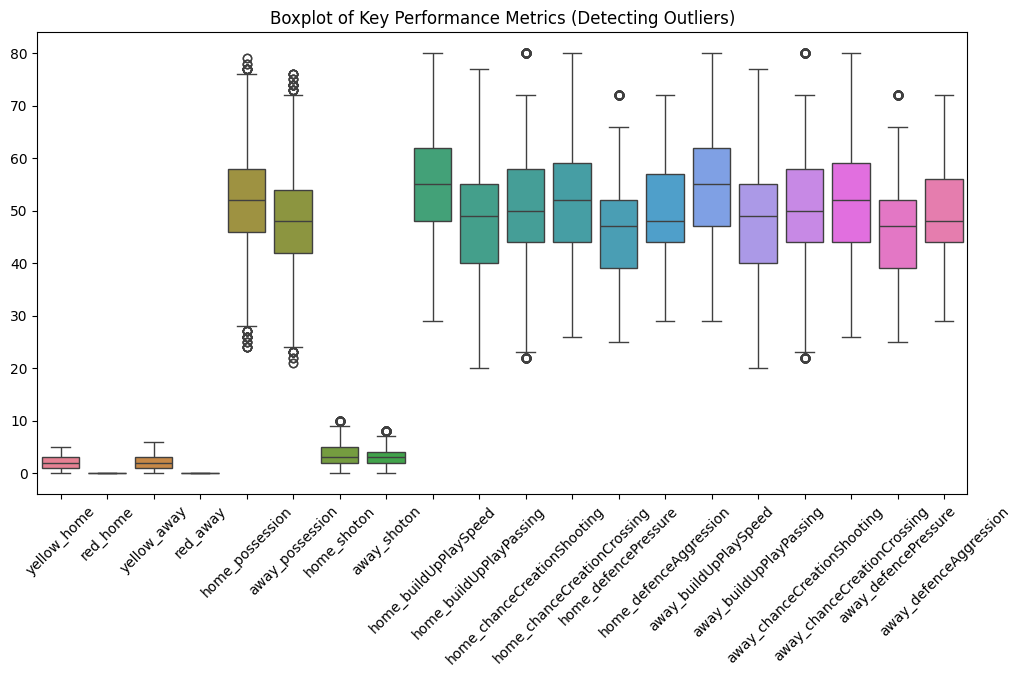

In [89]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=match_df_cleaned[metrics])
plt.xticks(rotation=45)
plt.title("Boxplot of Key Performance Metrics (Detecting Outliers)")
plt.show()

In [79]:
# Splitting
X = match_df_cleaned.iloc[:, :20]
y = match_df_cleaned['Outcome']
y = match_df_cleaned['Outcome'].astype(int)

# Train-Test Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize Features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)


In [90]:
#
# Setup hyper parameter tuning
#
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier

estimators = [
    ('clf', XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, reg_lambda=1.0, random_state=42))
]
pipe = Pipeline(steps=estimators)
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
    'clf__max_depth': Integer(2, 8),
    'clf__learning_rate': Real(0.001, 1.0),  # Remove 'prior' to test
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode': Real(0.5, 1.0),
    'clf__reg_alpha': Real(1e-5, 10.0),  # Avoid zero
    'clf__reg_lambda': Real(1e-5, 10.0),  # Avoid zero
    'clf__gamma': Real(1e-5, 10.0)  # Avoid zero
}

opt = BayesSearchCV(
    pipe, search_space, cv=5, n_iter=12,
    scoring='roc_auc_ovr',  # Use 'roc_auc_ovr' for multi-class, 'roc_auc' for binary
    random_state=8, n_jobs=-1
)


# Fit model
opt.fit(X_train, y_train)



BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       gamma=None,
                                                       grow_policy=None,
                                                       importance_type=None,
                                                       interaction_constraints=...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=1e-05, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=1e-05, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [91]:
opt.score(X_test, y_test)

0.6660015299059893

In [92]:
opt.best_score_


0.6521121990209848

In [93]:
opt.predict_proba(X_test)

array([[0.25021687, 0.11636034, 0.6334228 ],
       [0.21067008, 0.6754929 , 0.1138371 ],
       [0.3124784 , 0.22690241, 0.4606192 ],
       ...,
       [0.33526844, 0.36253318, 0.3021984 ],
       [0.21716467, 0.5786425 , 0.20419283],
       [0.12783554, 0.7573705 , 0.11479396]], dtype=float32)

In [94]:
opt.predict(X_test)

array([2, 1, 2, ..., 1, 1, 1])

In [95]:
opt.best_estimator_.steps

[('clf',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=0.7160044460033754,
                colsample_bynode=0.5634842539270097,
                colsample_bytree=0.8894150401192538, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=0.1284186778782785,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.2807088062362484,
                max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=4, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=200, n_jobs=None,
                num_parallel_tree=None, objective='multi:softprob', ...))]

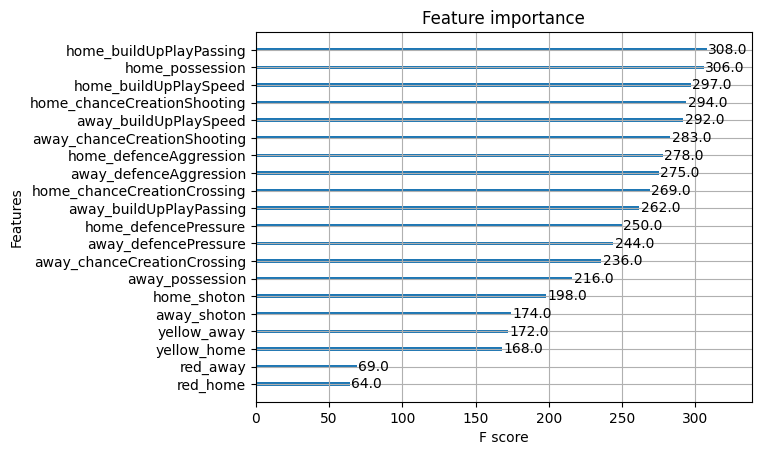

In [97]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Extract the XGBoost model from the pipeline
xgboost_model = opt.best_estimator_.named_steps['clf']

# Plot feature importance
plot_importance(xgboost_model)
plt.show()